In [409]:
import numpy as np
import scipy.stats
import pandas as pd

## Miary korelacji między parami danych

Kowariancja

In [410]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [411]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1)
cov_xy

19.95

In [412]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [413]:
x_.var(ddof=1)

np.float64(38.5)

In [414]:
y_.var(ddof=1)

np.float64(13.914285714285711)

In [415]:
cov_xy = cov_matrix[0, 1]
cov_xy

np.float64(19.95)

In [416]:
cov_xy = cov_matrix[1, 0]
cov_xy

np.float64(19.95)

In [417]:
cov_xy = x__.cov(y__)
cov_xy

np.float64(19.95)

In [418]:
cov_xy = y__.cov(x__)

In [419]:
cov_xy

np.float64(19.95)

Współczynnik korelacji

In [420]:
var_x = sum((item - mean_x) ** 2 for item in x) / (n - 1)
var_y = sum((item - mean_y) ** 2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

np.float64(0.8619500056316058)

In [421]:
r, p = scipy.stats.pearsonr(x_, y_)
r

np.float64(0.8619500056316061)

In [422]:
p

np.float64(5.122760847201142e-07)

Macierz współczynników korelacji

In [423]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [424]:
r = corr_matrix[0, 1]
r

np.float64(0.8619500056316061)

In [425]:
r = corr_matrix[1, 0]

In [426]:
r

np.float64(0.861950005631606)

Współczynnik korelacji w module SciPy

In [427]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=np.float64(0.5181818181818181), intercept=np.float64(5.714285714285714), rvalue=np.float64(0.861950005631606), pvalue=np.float64(5.122760847201165e-07), stderr=np.float64(0.06992387660074979), intercept_stderr=np.float64(0.4234100995002589))

In [428]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

np.float64(0.861950005631606)

Współczynnik korelacji w module Pandas

In [429]:
r = x__.corr(y__)
r

np.float64(0.8619500056316061)

In [430]:
r = y__.corr(x__)
r

np.float64(0.861950005631606)

### Praca z danymi 2D

Osie (axis)

In [431]:
a = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [4, 9, 2],
    [8, 27, 4],
    [16, 1, 1],
])

a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

axis = None

In [432]:
np.mean(a)

np.float64(5.4)

In [433]:
a.mean()

np.float64(5.4)

In [434]:
np.median(a)

np.float64(2.0)

In [435]:
a.var(ddof=1)

np.float64(53.40000000000001)

axis = 0 - dla każdej kolumny

In [436]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [437]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

axis = 1 - dla każdego wiersza

In [438]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [439]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

Działa tak samo w innych funkcjach

In [440]:
np.median(a, axis=0)

array([4., 3., 1.])

In [441]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [442]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [443]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

Axis w module Scipy

In [444]:
scipy.stats.gmean(a)  # Default: axis = 0

array([4.        , 3.73719282, 1.51571657])

In [445]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [446]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [447]:
scipy.stats.gmean(a, axis=None)

np.float64(2.829705017016332)

Podsumowanie statystyk z użyciem axis

In [448]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(np.int64(1), np.int64(27)), mean=np.float64(5.4), variance=np.float64(53.40000000000001), skewness=np.float64(2.264965290423389), kurtosis=np.float64(5.212690982795767))

In [449]:
scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis = 0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [450]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

C:\Users\Arek\AppData\Local\Temp\ipykernel_4304\2822311962.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  scipy.stats.describe(a, axis=1, ddof=1, bias=False)
C:\Users\Arek\PycharmProjects\Statistics-Algebra\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
C:\Users\Arek\PycharmProjects\Statistics-Algebra\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))

In [451]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

C:\Users\Arek\AppData\Local\Temp\ipykernel_4304\1697279159.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)


array([ 1.,  2.,  5., 13.,  6.])

Ramki danych (Data Frames)

In [452]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [453]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [454]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [455]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [456]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

Wyizolowanie kolumny

In [457]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64

In [458]:
df['A'].mean()

np.float64(6.2)

In [459]:
df['A'].var()

np.float64(37.20000000000001)

Data Frame jako tablica NumPy

In [460]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [461]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

Kod podsumowania

In [462]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


Wybór percentyli

In [463]:
df.describe().at['mean', 'A']

np.float64(6.2)

In [464]:
df.describe().at['50%', 'B']

np.float64(3.0)

Macierz korelacji wielu zmiennych

In [465]:
data = {
    'x': [45, 37, 42, 35, 39],
    'y': [38, 31, 26, 28, 33],
    'z': [10, 15, 17, 21, 12]
}

dataframe = pd.DataFrame(data, columns=['x', 'y', 'z'])
print(f'Dataframe is:')
print(dataframe)

matrix = dataframe.corr()
print(f'Correlation matrix is:')
print(matrix)

Dataframe is:
    x   y   z
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12
Correlation matrix is:
          x         y         z
x  1.000000  0.518457 -0.701886
y  0.518457  1.000000 -0.860941
z -0.701886 -0.860941  1.000000


In [466]:
from sklearn import datasets

dataset = datasets.load_iris()
dataframe = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
dataframe['target'] = dataset.target

matrix = dataframe.corr()
print(matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


Wizualizacja macierzy korelacji

<Axes: >

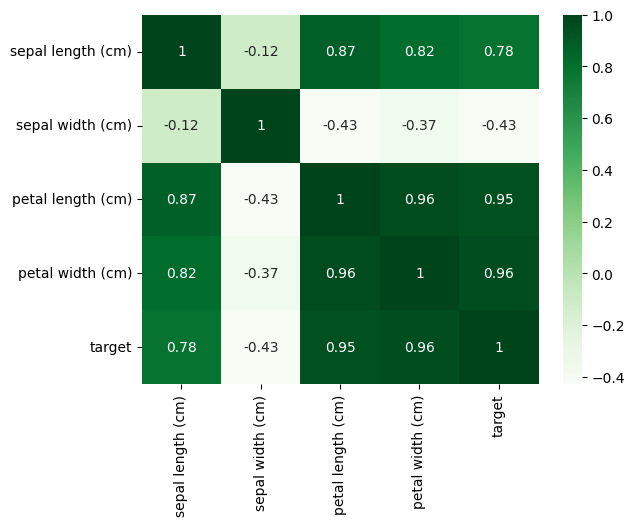

In [467]:
import seaborn as sns

dataset = datasets.load_iris()
dataframe = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
dataframe['target'] = dataset.target
matrix = dataframe.corr()

sns.heatmap(matrix, cmap='Greens', annot=True)

### Wieloraka regresja liniowa

Przykład w NumPy i Statmodels

In [468]:
import statsmodels.api as sm

y = [1, 2, 3, 4, 3, 4, 5, 4, 5, 5, 4, 5, 4, 5, 4, 5, 6, 5, 4, 5, 4, 3, 4]

x = [
    [4, 2, 3, 4, 5, 4, 5, 6, 7, 4, 8, 9, 8, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5],
    [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 1, 8, 7, 7, 7, 7, 6, 5],
    [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 6, 6, 4, 4, 4]
]


def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [469]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     6.050
Date:                Sat, 12 Oct 2024   Prob (F-statistic):            0.00453
Time:                        16:17:05   Log-Likelihood:                -27.115
No. Observations:                  23   AIC:                             62.23
Df Residuals:                      19   BIC:                             66.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3300      0.131      2.523      0.0

Przykład w scikit-learn i Statmodels

In [470]:
data = {
    "year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
             2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    "month": [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    "interest_rate": [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2,
                      1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
    "unemployment_rate": [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9,
                          6, 5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1],
    "index_price": [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130,
                    1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]
}

df = pd.DataFrame(data)

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

Sprawdzanie liniowości

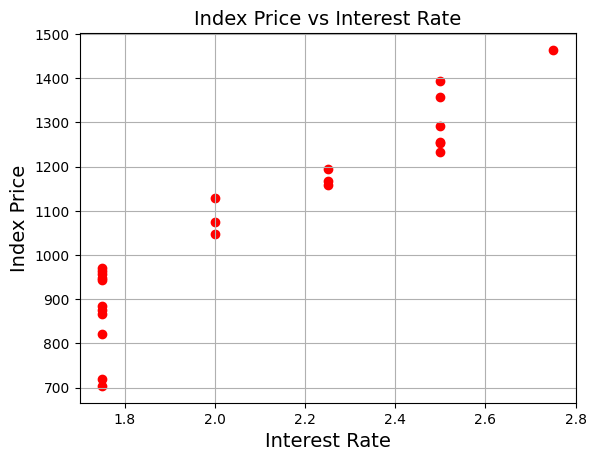

In [471]:
import matplotlib.pyplot as plt

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

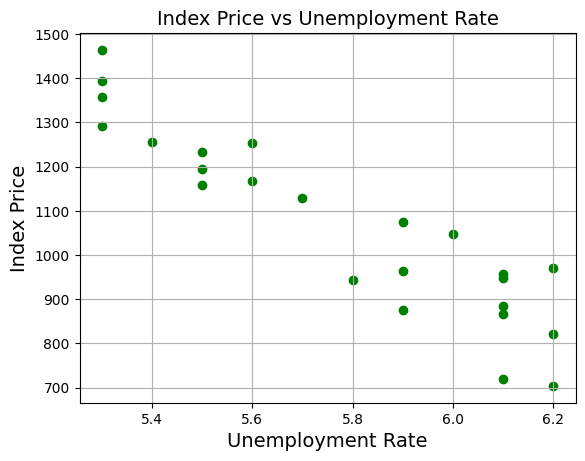

In [472]:
plt.scatter(df['unemployment_rate'], df['index_price'], color='green')
plt.title('Index Price vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

Dwie badane zależności wyglądają na liniowe.

### Wykonywanie wielorakiej regresji liniowej

Sklearn

In [473]:
from sklearn import linear_model

x = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

regression = linear_model.LinearRegression()
regression.fit(x, y)
predictions_sklearn = regression.predict(x)
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)
# print('Correlation r: \n', r_regression(x, y))
# nie istnieje metoda r_regression

Intercept: 
 1798.4039776258544
Coefficients: 
 [ 345.54008701 -250.14657137]


Statsmodels

In [474]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions_statsmodels = model.predict(x)
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           4.04e-11
Time:                        16:17:05   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24